# Checkpoint 1

Reminder: 

- You are being evaluated for compeletion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>.
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

Include comments throughout your code! Every cleanup and preprocessing task should be documented.

Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [32]:
import numpy as np
import pandas as pd
import matplotlib

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [3]:
df = pd.read_csv('../data/states_edu.csv')
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [44]:
#rename to more convienient format
df.rename({
    'GRADES_PK_G':'ENROLL_PREK',
    'GRADES_KG_G':'ENROLL_KINDER',
    'GRADES_4_G':'ENROLL_4',
    'GRADES_8_G':'ENROLL_8',
    'GRADES_12_G':'ENROLL_12',
    'GRADES_1_8_G':'ENROLL_PRIMARY',
    'GRADES_9_12_G':'ENROLL_HS',
    'GRADES_ALL_G':'ENROLL_ALL',
    'ENROLL':'ENROLL_ALL_EST'
    },
    axis=1,inplace=True)
#gettig rid of Nan values in math score to ensure all data has plottable points for grade 5 math (chosen variable)
df.dropna(subset=['AVG_MATH_4_SCORE'], inplace=True)
df

,PRIMARY_KEY,STATE,YEAR,ENROLL_ALL_EST,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,ENROLL_12,ENROLL_PRIMARY,ENROLL_HS,ENROLL_ALL,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,INSTRUC_EXPENDITURE_PER_STUDENT,MATH_DIFF
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN,2.025197,44.0
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN,2.132082,50.0
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN,2.184247,46.0
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN,2.732512,53.0
5,1992_COLORADO,COLORADO,1992,NaN,3185173.0,163253.0,1307986.0,1713934.0,3264826.0,1642466.0,...,34533.0,NaN,NaN,612635.0,221.0,272.0,217.0,NaN,2.680986,51.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1219,2015_VIRGINIA,VIRGINIA,2015,1279867.0,15857524.0,1012205.0,6240349.0,8604970.0,16113212.0,8755896.0,...,90391.0,772414.0,386781.0,1283590.0,247.0,288.0,229.0,267.0,6.821412,41.0
1220,2015_WASHINGTON,WASHINGTON,2015,1072359.0,13709442.0,1036422.0,8293812.0,4379208.0,13630138.0,6508964.0,...,89258.0,656797.0,336808.0,1087030.0,245.0,287.0,226.0,267.0,5.987842,42.0
1221,2015_WEST_VIRGINIA,WEST_VIRGINIA,2015,279565.0,3478401.0,362959.0,1979466.0,1135976.0,3466981.0,1819903.0,...,18432.0,162070.0,80142.0,277452.0,235.0,271.0,216.0,260.0,6.559344,36.0
1222,2015_WISCONSIN,WISCONSIN,2015,861813.0,11637376.0,814385.0,5869265.0,4953726.0,11553677.0,5723474.0,...,66253.0,489919.0,263896.0,867800.0,243.0,289.0,223.0,270.0,6.595384,46.0


<h2>Exploratory Data Analysis (EDA) </h2>

Chosen one of Grade 4 Reading, Grade 4 Math, or Grade 8 Math to focus on: Grade 4 Math

How many years of data are logged in our dataset? 

In [5]:
df["YEAR"].nunique()

13

Let's compare Michigan to Ohio. Which state has the higher average across all years in the test you chose?

In [43]:
print("MICHIGAN", df[df["STATE"] == "MICHIGAN"]["AVG_MATH_4_SCORE"].mean())
print("OHIO", df[df["STATE"] == "OHIO"]["AVG_MATH_4_SCORE"].mean())
if (df[df["STATE"] == "MICHIGAN"]["AVG_MATH_4_SCORE"].mean() > df[df["STATE"] == "OHIO"]["AVG_MATH_4_SCORE"].mean()):
    print("MICHIGAN LARGER")
elif (df[df["STATE"] == "OHIO"]["AVG_MATH_4_SCORE"].mean() > df[df["STATE"] == "MICHIGAN"]["AVG_MATH_4_SCORE"].mean()):
    print("OHIO LARGER")
else:
    print("MICHIGAN/OHIO EQUAL")

MICHIGAN 234.0
OHIO 239.11111111111111
OHIO LARGER


Find the average for your chosen test across all states in 2019

In [7]:
df[df["YEAR"] == 2019]["AVG_MATH_4_SCORE"].mean()

239.9433962264151

For each state, find a maximum value for your chosen test score

Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

In [8]:
df.groupby(["STATE"])["AVG_MATH_4_SCORE"].max()

STATE
ALABAMA                 233.0
ALASKA                  237.0
ARIZONA                 240.0
ARKANSAS                240.0
CALIFORNIA              235.0
COLORADO                247.0
CONNECTICUT             245.0
DELAWARE                243.0
DISTRICT_OF_COLUMBIA    235.0
DODEA                   250.0
FLORIDA                 246.0
GEORGIA                 240.0
HAWAII                  243.0
IDAHO                   242.0
ILLINOIS                239.0
INDIANA                 249.0
IOWA                    246.0
KANSAS                  248.0
KENTUCKY                242.0
LOUISIANA               234.0
MAINE                   246.0
MARYLAND                247.0
MASSACHUSETTS           253.0
MICHIGAN                238.0
MINNESOTA               253.0
MISSISSIPPI             241.0
MISSOURI                241.0
MONTANA                 244.0
NATIONAL                242.0
NEBRASKA                246.0
NEVADA                  237.0
NEW_HAMPSHIRE           253.0
NEW_JERSEY              249.0
NEW_

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [45]:
#ensures all variables being compared has values (so removes all Nan)
df["INSTRUC_EXPENDITURE_PER_STUDENT"] = df["INSTRUCTION_EXPENDITURE"] / df["ENROLL_ALL"]
df.dropna(subset=["INSTRUC_EXPENDITURE_PER_STUDENT"], inplace=True)
df["MATH_DIFF"] = df["AVG_MATH_8_SCORE"] - df["AVG_MATH_4_SCORE"]
df.dropna(subset=["MATH_DIFF"], inplace=True)
df

,PRIMARY_KEY,STATE,YEAR,ENROLL_ALL_EST,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,ENROLL_12,ENROLL_PRIMARY,ENROLL_HS,ENROLL_ALL,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,INSTRUC_EXPENDITURE_PER_STUDENT,MATH_DIFF
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN,2.025197,44.0
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN,2.132082,50.0
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN,2.184247,46.0
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN,2.732512,53.0
5,1992_COLORADO,COLORADO,1992,NaN,3185173.0,163253.0,1307986.0,1713934.0,3264826.0,1642466.0,...,34533.0,NaN,NaN,612635.0,221.0,272.0,217.0,NaN,2.680986,51.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1219,2015_VIRGINIA,VIRGINIA,2015,1279867.0,15857524.0,1012205.0,6240349.0,8604970.0,16113212.0,8755896.0,...,90391.0,772414.0,386781.0,1283590.0,247.0,288.0,229.0,267.0,6.821412,41.0
1220,2015_WASHINGTON,WASHINGTON,2015,1072359.0,13709442.0,1036422.0,8293812.0,4379208.0,13630138.0,6508964.0,...,89258.0,656797.0,336808.0,1087030.0,245.0,287.0,226.0,267.0,5.987842,42.0
1221,2015_WEST_VIRGINIA,WEST_VIRGINIA,2015,279565.0,3478401.0,362959.0,1979466.0,1135976.0,3466981.0,1819903.0,...,18432.0,162070.0,80142.0,277452.0,235.0,271.0,216.0,260.0,6.559344,36.0
1222,2015_WISCONSIN,WISCONSIN,2015,861813.0,11637376.0,814385.0,5869265.0,4953726.0,11553677.0,5723474.0,...,66253.0,489919.0,263896.0,867800.0,243.0,289.0,223.0,270.0,6.595384,46.0


Feature engineering justification: **I added a column that looks at instruction expenditure per student (INSTRUC_EXPENDITURE_PER_STUDENT) for each state in each year. This is to measure how much revenue is truly being put into academics, which can then be compared to math success. I additonally put in a column looking at the difference between 8th grade and 4th grade math scores (MATH_DIFF) to measure progress. As before, I removed anything rows with empty data in those columns to ensure accurate data**

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

In [10]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Average 4th Grade Math Score vs State Expenditure on Instruction per Student')

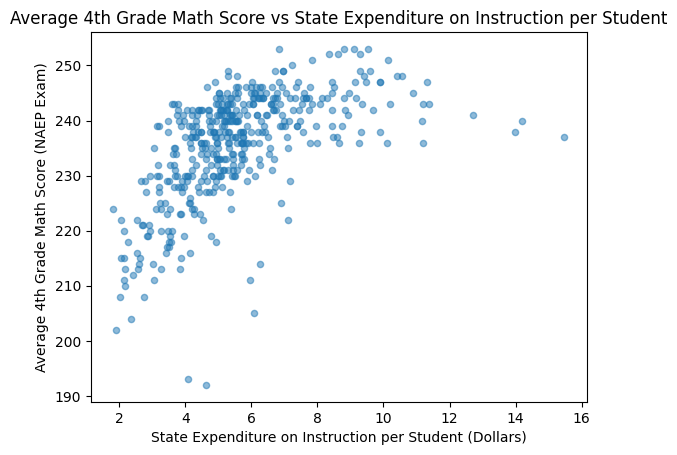

In [47]:
#compares instruction expenditure per student to NAEP 4th grade math score
df.plot.scatter(x='INSTRUC_EXPENDITURE_PER_STUDENT', y='AVG_MATH_4_SCORE', alpha=0.5)
plt.xlabel('State Expenditure on Instruction per Student (Dollars)')
plt.ylabel('Average 4th Grade Math Score (NAEP Exam)')
plt.title("Average 4th Grade Math Score vs State Expenditure on Instruction per Student")

**There is a moderate correlation between instruction expenditure per student and 4th grade math score. There seems to be an upwards trend, but it is not strong enough to label it as strong. While it may imply that the states that spend more per student results in higher math scores, there are a decent amount of outliers about $10 and a few below. Additionally, score begin to level off as you reach the $8 range. Again, this framework does indicate a correlation, but it is not strong enough to call it a relationship.**

**Visualization 2**

Text(0.5, 1.0, 'Average 4th Grade Math Score vs Averge 4th Grade Reading Score')

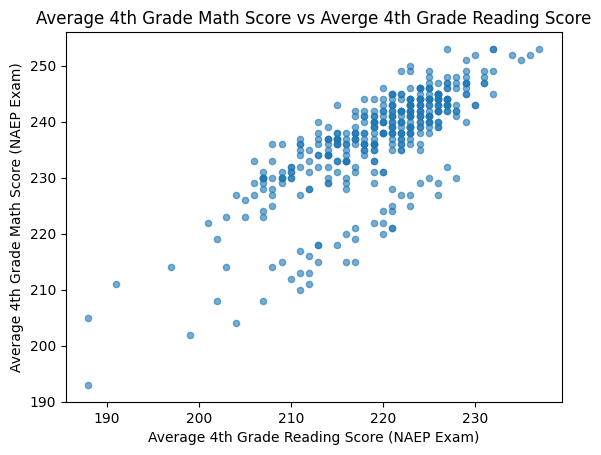

In [48]:
#compares 4th grade NAEP reading and math scores
df.plot.scatter(x='AVG_READING_4_SCORE', y='AVG_MATH_4_SCORE', alpha=0.6)
plt.xlabel('Average 4th Grade Reading Score (NAEP Exam)')
plt.ylabel('Average 4th Grade Math Score (NAEP Exam)')
plt.title("Average 4th Grade Math Score vs Averge 4th Grade Reading Score")

**There is a moderatly strong correlation between 4th grade reading score and 4th grade math score. There seems to be an upwards trend, with minimal ouliers--but with a line of scores below the mass. This framework does indicate a correlational relationship.**

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [49]:
from sklearn.model_selection import train_test_split

In [52]:
#using predictors from above within machine learning model
X = df[['AVG_READING_4_SCORE','INSTRUC_EXPENDITURE_PER_STUDENT']].dropna()
y = df.loc[X.index]['AVG_MATH_4_SCORE']
#skewed left so gives more accurate filled values
y.fillna(y.median(), inplace=True)

In [53]:
#sets aside 80% of data to test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [54]:
# import your sklearn class here
#first experience with machine learning so using linear regression for simplicity
from sklearn.linear_model import LinearRegression

In [55]:
# create your model here
model = LinearRegression()

In [56]:
model.fit(X_train, y_train)

LinearRegression()

In [57]:
#looks at linear regression model to see how predictors are related to 4th grade math score
y_pred = model.predict(X_test)
print(model.score(X_test, y_test))
print(model.intercept_)
print(model.coef_)
print(y_pred)

0.6742341436475887
50.16618348123788
[0.82293424 1.07185407]
[233.31310523 237.46296164 232.89314088 237.27584191 225.74867814
 228.77247447 242.26330464 230.47718298 240.52975879 233.40451559
 227.33097951 237.00456704 236.28501525 243.22117175 235.07044227
 224.64301479 241.44032916 248.68016689 242.68633147 250.28843
 238.06099297 220.58120013 236.10892533 235.66955678 222.68428668
 242.56741447 248.20872122 242.72225544 238.51067258 228.88758503
 245.92968228 231.25003249 233.00247482 238.48539304 241.26959315
 241.24960128 237.63576147 240.76513648 238.50078521 232.91371919
 238.79890864 233.23084835 237.56215511 239.40966681 231.52499834
 241.67201465 228.02015396 233.23182952 233.91597561 228.91552617
 224.63082052 233.89196666 231.92790561 224.42568915 237.72687715
 230.73244778 242.84781918 251.29024507 231.83141079 219.00866342
 225.09281311 232.78071075 226.02285647 229.96913484 213.74717139
 233.51588032 242.1228633  232.15626193 233.00266758 221.33442782
 235.27302646 238.

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [60]:
print(np.mean(model.predict(X_test)-y_test))
print(np.mean(np.abs(model.predict(X_test)-y_test)))
print(np.mean((model.predict(X_test)-y_test)**2)**0.5)
#i really struggled understanding machine learning in general which confused me for the metrics, so i just used the same
#as the tutorial. i utilized office hours for help but this was my biggest weakness and i think my ability will grow with more 
#practice and time

0.6385655313145981
4.149703625592722
5.855458843921269


We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

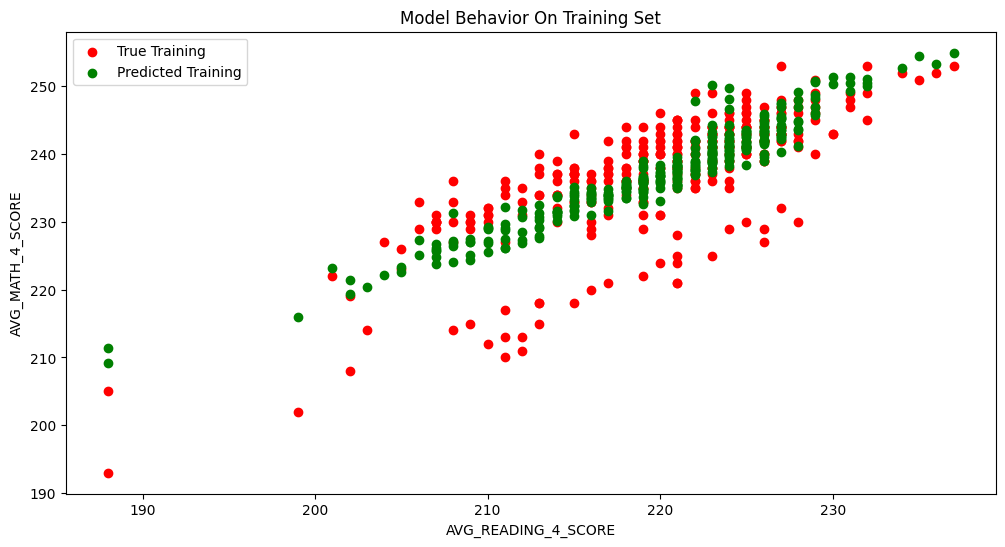

In [61]:
col_name = 'AVG_READING_4_SCORE'

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('AVG_MATH_4_SCORE')
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior on Testing Set')

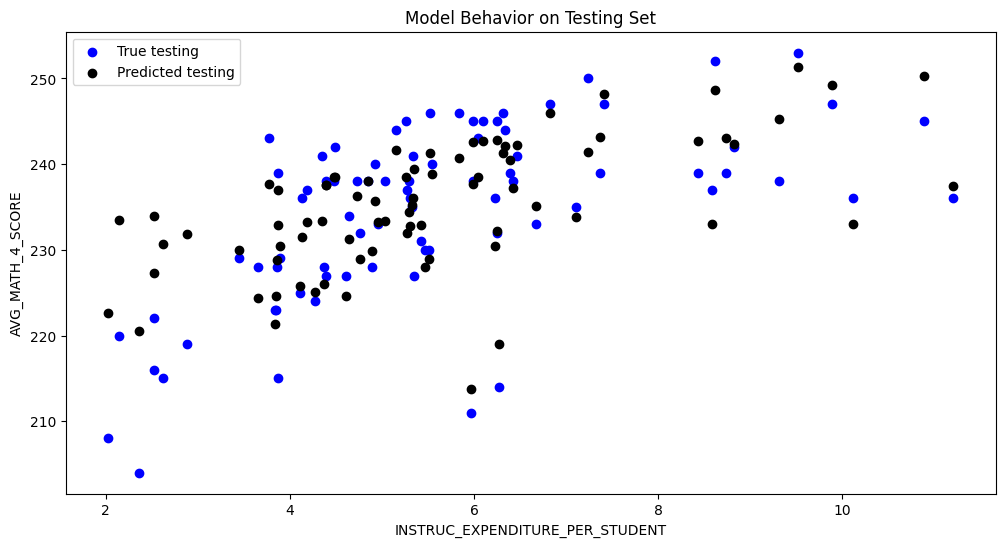

In [62]:
col_name = 'INSTRUC_EXPENDITURE_PER_STUDENT'

f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('AVG_MATH_4_SCORE')
plt.title("Model Behavior on Testing Set")

<h2> Summary </h2>

I examined average 4th grade math scores and its relationships to instruction expenditure per student and to 4th grade reading scores. The intention was to find if more spending increased quality of education, resulting in higher scores; furthermore, to see if there was any discrepancy between reading and math scores, if one was being taught better than the other. These insights determined if performance was all from education, or if natural academic ability or other confounding factors had an influence. From my findings and scatterplots, there is a moderate correalation between expenditure per student and math performance, indicating that investment in education does minorly impact their math abilites with some influence from outside sources such as natural talent. Additionally, there was a modertly strong correlation between reading and math scores, showing that education levels has been profficient in both accross time, not having one subject be emphasized over another. My model performed relatvely well. With an R^2 value of 0.6389, it is evidenct that the predictors examined have a minor relationship with 4th grade math NAEP score, as seen in the plots and the model behavior graphs above. Overall, instruction expendture per student does positively impact scores, and the funding does equally educate reading and math; however, natural abilites and other confounding factors do seem to have an influence, but they proportionatly influence 4th grade reading and math. This implies that the ***best way to predict 4th grade math score is look at reading score--and reading score will be accurate is instruction expenditure is high for student***